In [29]:
# Fall23-INFO299-FinalProject-EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

import copy

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer


from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset

In [30]:
!wget sooryansatheesh.github.io/datarepo/UCBerkeley/INFO299Fall23-DeepLearningEnvironment/nationalforests.csv

URL transformed to HTTPS due to an HSTS policy
--2023-12-13 23:38:32--  https://sooryansatheesh.github.io/datarepo/UCBerkeley/INFO299Fall23-DeepLearningEnvironment/nationalforests.csv
Resolving sooryansatheesh.github.io (sooryansatheesh.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to sooryansatheesh.github.io (sooryansatheesh.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22632778 (22M) [text/csv]
Saving to: ‘nationalforests.csv.1’

nationalforests.csv 100%[===================>]  21.58M  --.-KB/s    in 0.1s    

2023-12-13 23:38:32 (221 MB/s) - ‘nationalforests.csv.1’ saved [22632778/22632778]



In [31]:
df = pd.read_csv("nationalforests.csv",delimiter=',')

df.head()

,Unnamed: 0,FID,latitude,longitude,brightness,acq_time,confidence,bright_t31,frp,daynight,type,year,Month,CALVEGZONE,FORESTNAME,date,county_name
0,0,0,32.6629,-116.5128,307.7,1858,35,290.0,13.3,D,0,2016,January,South Coast,Cleveland National Forest,2016-01-20,San Diego
1,1,1,32.6683,-116.6507,346.5,2045,92,314.5,56.2,D,0,2007,October,South Coast,Cleveland National Forest,2007-10-24,San Diego
2,2,2,32.6693,-116.6427,375.7,944,100,305.1,136.6,N,0,2007,October,South Coast,Cleveland National Forest,2007-10-24,San Diego
3,3,3,32.6699,-116.6648,424.9,1827,100,323.3,499.4,D,0,2007,October,South Coast,Cleveland National Forest,2007-10-23,San Diego
4,4,4,32.6706,-116.6373,348.6,2045,93,309.0,62.9,D,0,2007,October,South Coast,Cleveland National Forest,2007-10-24,San Diego


In [32]:
# df2 = pd.read_csv("raw.csv",delimiter=',')

# df2.head()

In [33]:
df.shape

(175260, 17)

In [34]:
df.columns

Index(['Unnamed: 0', 'FID', 'latitude', 'longitude', 'brightness', 'acq_time',
       'confidence', 'bright_t31', 'frp', 'daynight', 'type', 'year', 'Month',
       'CALVEGZONE', 'FORESTNAME', 'date', 'county_name'],
      dtype='object')

In [35]:
df.dtypes

Unnamed: 0       int64
FID              int64
latitude       float64
longitude      float64
brightness     float64
acq_time         int64
confidence       int64
bright_t31     float64
frp            float64
daynight        object
type             int64
year             int64
Month           object
CALVEGZONE      object
FORESTNAME      object
date            object
county_name     object
dtype: object

In [36]:
df.describe()

,Unnamed: 0,FID,latitude,longitude,brightness,acq_time,confidence,bright_t31,frp,type,year
count,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.000000,175260.0,175260.000000
mean,87629.500000,87629.500000,38.915718,-121.152410,336.397621,1402.095852,75.845161,297.095314,137.305043,0.0,2015.211104
std,50593.348426,50593.348426,2.398946,1.915815,31.774483,651.927140,25.696507,11.754780,376.624124,0.0,5.987775
min,0.000000,0.000000,32.662900,-124.056800,300.000000,458.000000,0.000000,265.000000,0.000000,0.0,2000.000000
25%,43814.750000,43814.750000,37.184800,-123.038200,315.100000,633.000000,59.000000,290.100000,18.975000,0.0,2009.000000
50%,87629.500000,87629.500000,39.851700,-121.264050,327.800000,1825.000000,84.000000,295.500000,40.300000,0.0,2018.000000
75%,131444.250000,131444.250000,40.866500,-119.609800,347.100000,2050.000000,100.000000,302.400000,101.700000,0.0,2020.000000
max,175259.000000,175259.000000,42.005800,-116.379300,508.800000,2219.000000,100.000000,400.100000,11944.200000,0.0,2022.000000


In [37]:
df.nunique()

Unnamed: 0     175260
FID            175260
latitude        59289
longitude       55234
brightness       2033
acq_time          525
confidence        101
bright_t31        903
frp             11719
daynight            2
type                1
year               23
Month              12
CALVEGZONE          9
FORESTNAME         21
date             3950
county_name        39
dtype: int64

In [38]:
# Calculate the percentage of rows with NaN values in each column
percentage_nan = (df.isna().mean() * 100).round(2)

# Create a new DataFrame with column names as the index
percentage_nan_df = pd.DataFrame({'Percentage of NaN': percentage_nan})

# Print the DataFrame with column names as the index
print(percentage_nan_df)

             Percentage of NaN
Unnamed: 0                 0.0
FID                        0.0
latitude                   0.0
longitude                  0.0
brightness                 0.0
acq_time                   0.0
confidence                 0.0
bright_t31                 0.0
frp                        0.0
daynight                   0.0
type                       0.0
year                       0.0
Month                      0.0
CALVEGZONE                 0.0
FORESTNAME                 0.0
date                       0.0
county_name                0.0


In [39]:
#Feature Engineering Brightness df['brightness']

bin_edges = [300, 400, 500, float('inf')]
bin_labels = ['Category 1', 'Category 2', 'Category 3']

df['brightness_category'] = pd.cut(df['brightness'], bins=bin_edges, labels=bin_labels)

df['brightness_category'] = pd.Categorical(df['brightness_category'], categories=bin_labels, ordered=True)

In [40]:
df['brightness_category'].value_counts()

Category 1    166499
Category 2      8356
Category 3       313
Name: brightness_category, dtype: int64

In [41]:
min_cat_value=df['brightness_category'].value_counts().min()
balanced_df=pd.DataFrame()
for category in df['brightness_category'].dropna().unique():
  subset=df[df['brightness_category'] == category].sample(n=min_cat_value, random_state=42)
  balanced_df = pd.concat([balanced_df, subset], ignore_index=True)

df=balanced_df
df['brightness_category'].value_counts()

Category 1    313
Category 2    313
Category 3    313
Name: brightness_category, dtype: int64

In [42]:
#Feature Engineering the Date Value

df['date'] = pd.to_datetime(df['date'], errors ='coerce')
df['weekday']=df['date'].dt.dayofweek
df['week']=df['date'].dt.week
df['timestamp'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


# Drop the original date column
df = df.drop(['date'], axis=1)

<ipython-input-42-f5bd4b677788>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['date'].dt.week


In [43]:
# Convert latitude and longitude to Cartesian coordinates
df['x'] = np.cos(np.radians(df['latitude'])) * np.cos(np.radians(df['longitude']))
df['y'] = np.cos(np.radians(df['latitude'])) * np.sin(np.radians(df['longitude']))
df['z'] = np.sin(np.radians(df['latitude']))

# Drop the original latitude and longitude columns
df = df.drop(['latitude', 'longitude'], axis=1)

In [44]:
#Dropping certain columns

df=df.drop(['Unnamed: 0', 'FID','type','bright_t31','brightness'], axis=1)

In [45]:
# Handling Categorical and continuous Features

categorical_features=['daynight','county_name','weekday','CALVEGZONE','FORESTNAME','Month']
continuous_features=['x','y','z','acq_time','confidence','frp','week','year','timestamp']
cols_used=categorical_features+continuous_features

In [46]:
conti_fields = ['x', 'y', 'z', 'acq_time', 'confidence', 'frp', 'week', 'year','timestamp']

# Using the shapiro wilk test for normality

for field in continuous_features:
    stat, p_value = shapiro(df[field])
    print(f'Shapiro-Wilk test for {field}: p-value = {p_value}')

# The results suggest that the data is not normal


Shapiro-Wilk test for x: p-value = 6.923487251408122e-18
Shapiro-Wilk test for y: p-value = 1.1143645380404263e-19
Shapiro-Wilk test for z: p-value = 1.9863154717448676e-24
Shapiro-Wilk test for acq_time: p-value = 1.0381956878071277e-37
Shapiro-Wilk test for confidence: p-value = 1.317220556465328e-43
Shapiro-Wilk test for frp: p-value = 1.2996935941813164e-34
Shapiro-Wilk test for week: p-value = 2.901903775302201e-17
Shapiro-Wilk test for year: p-value = 2.2061986543499783e-33
Shapiro-Wilk test for timestamp: p-value = 2.2666576348906302e-33


In [47]:
# We now use the Quantile transformer to bring normalization
for column in continuous_features:
    df[column] = QuantileTransformer(output_distribution='normal').fit_transform(df[column].values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). 

In [48]:
# We now use the Quantile transformer to bring normalization

# transformer_x = QuantileTransformer(output_distribution='normal')
# transformer_y = QuantileTransformer(output_distribution='normal')
# transformer_z = QuantileTransformer(output_distribution='normal')
# transformer_acqtime = QuantileTransformer(output_distribution='normal')
# transformer_confidence = QuantileTransformer(output_distribution='normal')
# transformer_frp = QuantileTransformer(output_distribution='normal')
# transformer_year = QuantileTransformer(output_distribution='normal')
# transformer_week = QuantileTransformer(output_distribution='normal')
# transformer_timestamp = QuantileTransformer(output_distribution='normal')
# df['confidence'] = transformer_confidence.fit_transform(df['confidence'].values.reshape(-1, 1))
# df['x'] = transformer_x.fit_transform(df['x'].values.reshape(-1, 1))
# df['y'] = transformer_y.fit_transform(df['y'].values.reshape(-1, 1))
# df['z'] = transformer_z.fit_transform(df['z'].values.reshape(-1, 1))
# df['acq_time'] = transformer_acqtime.fit_transform(df['acq_time'].values.reshape(-1, 1))
# df['frp'] = transformer_frp.fit_transform(df['frp'].values.reshape(-1, 1))
# df['year'] = transformer_week.fit_transform(df['year'].values.reshape(-1, 1))
# df['week'] = transformer_week.fit_transform(df['week'].values.reshape(-1, 1))
# df['timestamp'] = transformer_timestamp.fit_transform(df['timestamp'].values.reshape(-1, 1))

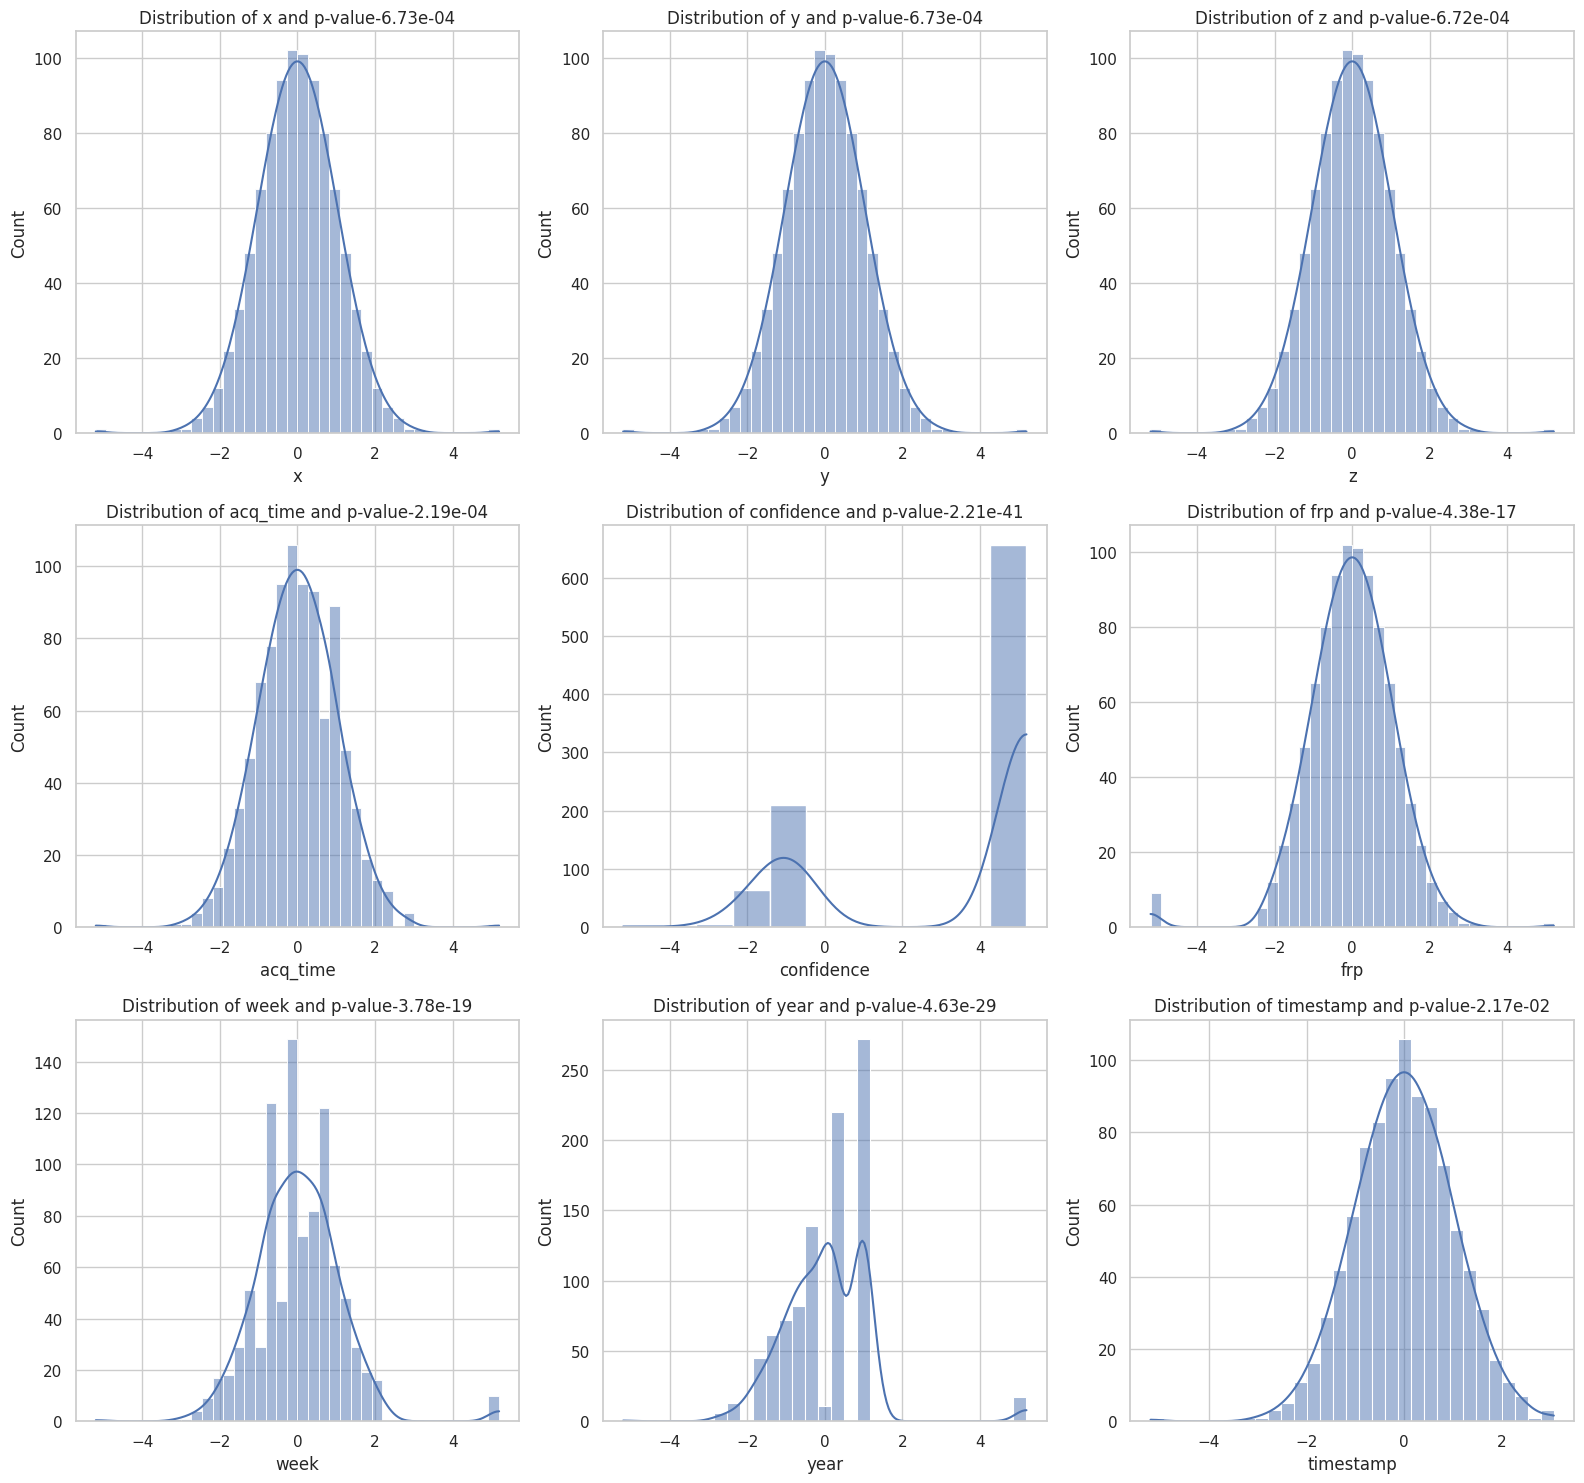

In [49]:
# Setting the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Calculating the number of rows and columns for subplots
num_cols = len(continuous_features)
num_rows = (num_cols - 1) // 3 + 1  # Adjust the number of columns per row as needed

# Set the size of the figure
plt.figure(figsize=(16, 5 * num_rows))

# Loop through all columns and plot the distribution
for i, column in enumerate(continuous_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], kde=True)
    stat, p_value = shapiro(df[column])
    plt.title(f'Distribution of {column} and p-value-{p_value:.2e}')

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [50]:
X=df[cols_used]
y=df['brightness_category']

# Create a OneHotEncoder object
encoder = OneHotEncoder(drop='first', sparse=False)

# Apply one-hot encoding to the categorical columns using fit_transform
X_encoded_array = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoder.get_feature_names_out(categorical_features), index=X.index)
X = pd.concat([X, X_encoded_df], axis=1)
X = X.drop(categorical_features, axis=1)

encoder_y = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_encoded_array = encoder_y.fit_transform(y.values.reshape(-1, 1))



# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y_encoded_array, dtype=torch.float32)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = X_train.shape[1]  # Assuming X_train is a DataFrame
output_size = y_train.shape[1]  # Since Y was one-hot encoded

In [52]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(input_size, 20)
        self.act = nn.ReLU()
        self.output = nn.Linear(20, output_size)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

In [53]:
# initializing the loss metric and optimizer

model = Multiclass()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [54]:
# preparing the  model and training parameters
num_epochs = 300
batch_size = 100
batches_per_epoch = len(X_train) // batch_size

In [55]:
accuracy_highest = - np.inf  #intialized to negative infinity
weights_best = None
history_of_training_loss = []
history_accuracy_of_training = []
history_of_test_loss = []
history_accuracy_of_test = []

No. 0 Epoch: 100%|██████████| 7/7 [00:00<00:00, 113.73batch/s, accuracy=0.54, loss=1.07]


Epoch No. 0 validation: Cross Entropy loss=1.08, Accuracy=59.0%


No. 1 Epoch: 100%|██████████| 7/7 [00:00<00:00, 99.89batch/s, accuracy=0.56, loss=1.05] 


Epoch No. 1 validation: Cross Entropy loss=1.05, Accuracy=59.6%


No. 2 Epoch: 100%|██████████| 7/7 [00:00<00:00, 114.97batch/s, accuracy=0.58, loss=1.02]


Epoch No. 2 validation: Cross Entropy loss=1.03, Accuracy=60.6%


No. 3 Epoch: 100%|██████████| 7/7 [00:00<00:00, 137.99batch/s, accuracy=0.6, loss=0.999]


Epoch No. 3 validation: Cross Entropy loss=1.00, Accuracy=62.8%


No. 4 Epoch: 100%|██████████| 7/7 [00:00<00:00, 154.74batch/s, accuracy=0.65, loss=0.972]


Epoch No. 4 validation: Cross Entropy loss=0.97, Accuracy=64.4%


No. 5 Epoch: 100%|██████████| 7/7 [00:00<00:00, 162.26batch/s, accuracy=0.68, loss=0.942]


Epoch No. 5 validation: Cross Entropy loss=0.94, Accuracy=70.2%


No. 6 Epoch: 100%|██████████| 7/7 [00:00<00:00, 160.12batch/s, accuracy=0.66, loss=0.912]


Epoch No. 6 validation: Cross Entropy loss=0.91, Accuracy=72.3%


No. 7 Epoch: 100%|██████████| 7/7 [00:00<00:00, 141.06batch/s, accuracy=0.63, loss=0.881]


Epoch No. 7 validation: Cross Entropy loss=0.88, Accuracy=73.9%


No. 8 Epoch: 100%|██████████| 7/7 [00:00<00:00, 153.18batch/s, accuracy=0.68, loss=0.849]


Epoch No. 8 validation: Cross Entropy loss=0.84, Accuracy=72.3%


No. 9 Epoch: 100%|██████████| 7/7 [00:00<00:00, 193.82batch/s, accuracy=0.71, loss=0.818]


Epoch No. 9 validation: Cross Entropy loss=0.81, Accuracy=72.3%


No. 10 Epoch: 100%|██████████| 7/7 [00:00<00:00, 159.35batch/s, accuracy=0.72, loss=0.787]


Epoch No. 10 validation: Cross Entropy loss=0.78, Accuracy=73.4%


No. 11 Epoch: 100%|██████████| 7/7 [00:00<00:00, 89.45batch/s, accuracy=0.71, loss=0.757]


Epoch No. 11 validation: Cross Entropy loss=0.75, Accuracy=73.9%


No. 12 Epoch: 100%|██████████| 7/7 [00:00<00:00, 122.02batch/s, accuracy=0.72, loss=0.729]


Epoch No. 12 validation: Cross Entropy loss=0.72, Accuracy=75.0%


No. 13 Epoch: 100%|██████████| 7/7 [00:00<00:00, 129.54batch/s, accuracy=0.73, loss=0.702]


Epoch No. 13 validation: Cross Entropy loss=0.70, Accuracy=75.5%


No. 14 Epoch: 100%|██████████| 7/7 [00:00<00:00, 121.20batch/s, accuracy=0.73, loss=0.678]


Epoch No. 14 validation: Cross Entropy loss=0.68, Accuracy=76.1%


No. 15 Epoch: 100%|██████████| 7/7 [00:00<00:00, 131.32batch/s, accuracy=0.75, loss=0.656]


Epoch No. 15 validation: Cross Entropy loss=0.66, Accuracy=76.1%


No. 16 Epoch: 100%|██████████| 7/7 [00:00<00:00, 126.51batch/s, accuracy=0.75, loss=0.635]


Epoch No. 16 validation: Cross Entropy loss=0.64, Accuracy=75.5%


No. 17 Epoch: 100%|██████████| 7/7 [00:00<00:00, 107.97batch/s, accuracy=0.75, loss=0.618]


Epoch No. 17 validation: Cross Entropy loss=0.63, Accuracy=74.5%


No. 18 Epoch: 100%|██████████| 7/7 [00:00<00:00, 168.02batch/s, accuracy=0.75, loss=0.601]


Epoch No. 18 validation: Cross Entropy loss=0.62, Accuracy=75.0%


No. 19 Epoch: 100%|██████████| 7/7 [00:00<00:00, 167.19batch/s, accuracy=0.76, loss=0.587]


Epoch No. 19 validation: Cross Entropy loss=0.61, Accuracy=74.5%
Early stopping at epoch 19 due to decreasing accuracy.


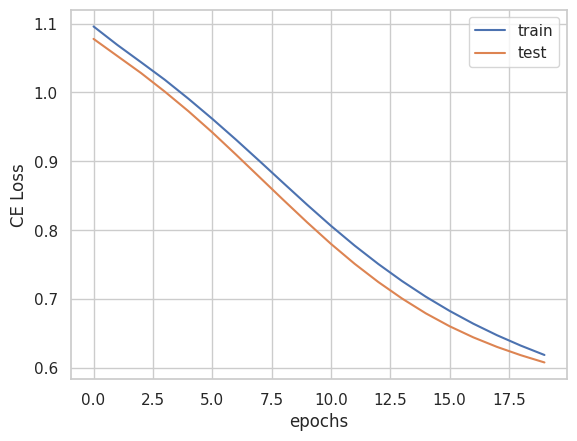

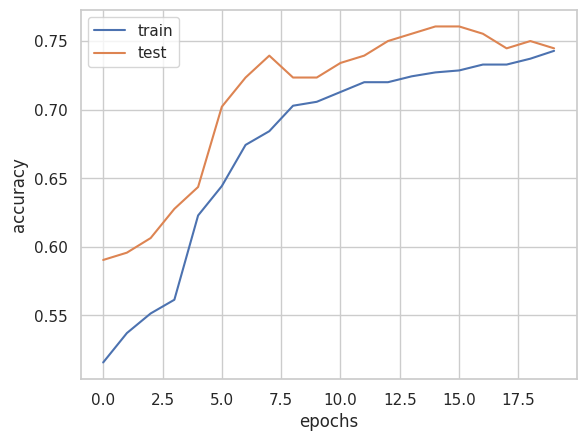

Confusion Matrix:
[[50  9  1]
 [ 3 50 14]
 [ 2 16 43]]


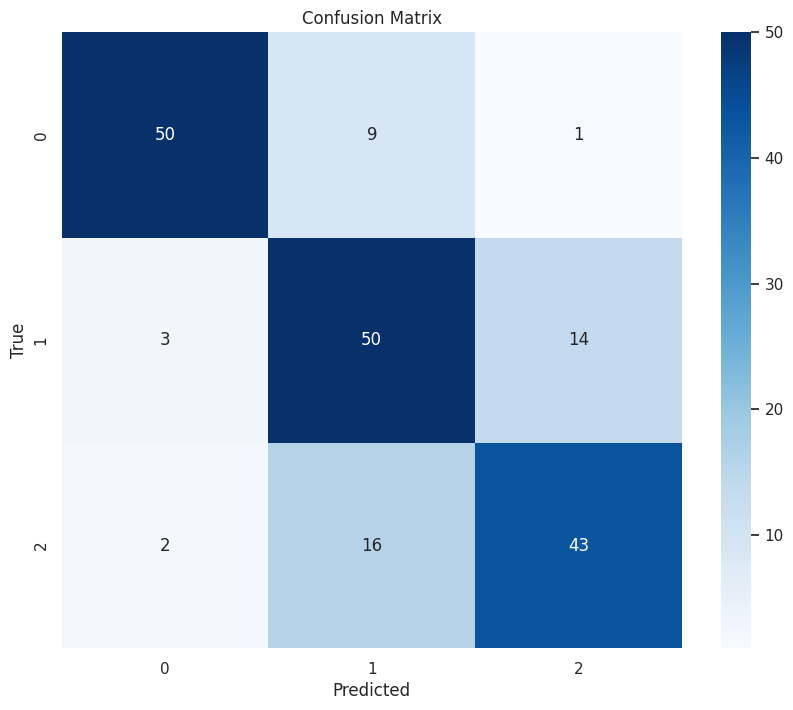

In [56]:
# training loop
for epoch in range(num_epochs):
    loss_in_epoch = []
    accuracy_in_epoch = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"No. {epoch} Epoch")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # model carries out forward pass
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch) # we determine the cross entropy loss

            # model now does backward pass
            optimizer.zero_grad()
            loss.backward()
            # updating weights of the model
            optimizer.step()

            # computing and storing metrics from this batch
            accuracy = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()

            #all batch losses in the epoch are stored
            loss_in_epoch.append(float(loss))

            #all batch accuracies in the epoch are stored
            accuracy_in_epoch.append(float(accuracy))

            bar.set_postfix(
                loss=float(loss),
                accuracy=float(accuracy)
            )

    #Evaluating the model on the test set
    model.eval()

    with torch.no_grad(): #gradient tracking is turned off
        y_pred = model(X_test.float()) # generating the results when the model is applied on the test set
        # we compare the model test results (y_pred) with the actual values (y_test)
        accuracy=(torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean() #accuracy = correct / total
        accuracy=float(accuracy)
        loss = criterion(y_pred, torch.max(y_test, 1)[1])
        # calculating the cross entropy loss
        #criterion is the loss function criterion = nn.CrossEntropyLoss()

        history_of_training_loss.append(np.mean(loss_in_epoch))
        history_accuracy_of_training.append(np.mean(accuracy_in_epoch))
        history_of_test_loss.append(loss)
        history_accuracy_of_test.append(accuracy)

        if accuracy>accuracy_highest:
            # will store highest accuracy recorded in any of the epochs
            accuracy_highest=accuracy
            #now we will store the weights of the best model to the weights_best variable
            weights_best=copy.deepcopy(model.state_dict())
        print(f"Epoch No. {epoch} validation: Cross Entropy loss={loss:.2f}, Accuracy={accuracy*100:.1f}%")

          # Check if epoch is greater than 20 and accuracy is decreasing
        if epoch > 10:
            n=8
            last_accuracies = history_accuracy_of_test[-n:]
            if accuracy <= min(last_accuracies):
                print(f"Early stopping at epoch {epoch} due to decreasing accuracy.")
                break

# Restoring best model using the best weights identified during evaluation
model.load_state_dict(weights_best)

# Plot the loss and accuracy
plt.plot(history_of_training_loss, label="train")
plt.plot(history_of_test_loss, label="test")
plt.xlabel("epochs")
plt.ylabel("CE Loss")
plt.legend()
plt.show()

plt.plot(history_accuracy_of_training, label="train")
plt.plot(history_accuracy_of_test, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


model.eval()
with torch.no_grad():
    test_outputs = model(X_test.float())
    predicted = torch.argmax(test_outputs, dim=1)
    y_true = torch.max(y_test, 1)[1]
    # Computing and printing the confusion matrix
    cm = confusion_matrix(y_true, predicted)
    print("Confusion Matrix:")
    print(cm)

    # Visualizing the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(output_size), yticklabels=range(output_size))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
